# Gramener Case Study

This is an Exploratory Data Analysis (EDA) case study to understand how consumer attributes and loan attributes influence the tendency of default.

**Business Objectives**
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as **'charged-off'** are the **'defaulters'**. 

**If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.**
 
In other words, the company wants to **understand the driving factors (or driver variables) behind loan default**, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Loan application decisions

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
   * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
   * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed.These candidates are not labelled as 'defaulted'. 
   * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset).

In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import math as m

In [2]:
# load the dataset
# set column 47 (next_pymnt_d) as object (as we would otherwise get error)
col_dtype = {'next_pymnt_d':'object'}

loan_master = pd.read_csv('./loan.csv',dtype=col_dtype)

## Data Cleaning

In [3]:
# let us inspect the data frame
loan_master.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# check the % of missing values for various columns
100*loan_master.isnull().sum()/len(loan_master.index)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.188786
emp_length                          0.000000
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.577989
purpose                             0.000000
title                               0.025178
zip_code  

From the above it is clear that there are multiple columns that have more than 90% (some even 100%) of data as missing.
Let's remove such columns.

In [5]:
# let us remove all such columns where more than 90% values are NaN
# extract the column indexes for all such columns
col_index  =100*loan_master.isnull().sum()/len(loan_master.index) > 90

In [6]:
# let us check the columns
loan_master.columns[col_index]

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [7]:
# drop such columns
loan_master.drop(loan_master.columns[col_index],axis=1,inplace=True)

In [8]:
# let us check how many columns are remaining
len(loan_master.columns)

55

In [9]:
# let's check the proportion of missing values again
100*loan_master.isnull().sum()/len(loan_master.index)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.188786
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.577989
purpose                        0.000000
title                          0.025178
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


As part of data cleaning we can also remove columns which have static or zero variation values, as they are unlikely to influence our analysis with respect to loan default.

In [10]:
# we observe from csv that there are some additional columns that could be removed as they
# have almost no variation or fixed values, plus some additional values like title,emp_title and desc are
# not very uniform and hence can be removed.
ls_remove_cols = ['pymnt_plan','url','initial_list_status','policy_code','application_type','acc_now_delinq',
                  'delinq_amnt','title','desc','pymnt_plan','policy_code',
                  'application_type','acc_now_delinq','delinq_amnt','tax_liens',
                  'collections_12_mths_ex_med','chargeoff_within_12_mths','emp_title'        
                  ]

In [11]:
loan_master.drop(ls_remove_cols,axis=1,inplace=True)

In [12]:
# let us check the columns remaining.
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 39717 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
zip_code                   39717 non-null object
addr_state

Let us check proportion of values where loan_status is 'Current'

In [13]:
# proportion of current values
100*len(loan_master[(loan_master.loan_status=='Current')])/len(loan_master)

2.8703074250321023

as the % of records with 'Current' status is very low we will remove these rows from our data set.

In [14]:
loan_master = loan_master[~(loan_master.loan_status=='Current')]

In [15]:
# we observe that term column contains leading spaces, let's remove those
loan_master.term = loan_master.term.str.strip()

In [16]:
# extract the term value and convert to integer
loan_master.term = loan_master.term.apply(lambda x: int(x[0:2]))

In [17]:
# convert int_rate (interest rate to number)
loan_master.int_rate = loan_master.int_rate.apply(lambda x:x if pd.isnull(x) else x.split('%')[0])
loan_master.int_rate = loan_master.int_rate.astype('float')

In [18]:
# let's check the number of defaults and fully paid values
loan_master.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## Business Understanding

We researched the business cycle for lending and came to the understanding that the variables involved in lending cycle can be divided into three distinct categories as listed below:

* **Pre-Loan variables**: these are customer profile variables which are available during loan application phase. Some of these might indicate whether a customer is likely to default or not. These are the variables which we are going to identify and focus on during this EDA case study.

* **Loan variables**: these are the variables which typically lender controls and can adjust based on the profile of loan applicant. These variables are loan amount (that is finally approved), interest rate, term and monthly repayment amount. It is clear from business understanding that these variables should not be considered as driver variables for default.

* **Post-Loan variables**: these are variables which are generated after the loan has been granted to loan applicant and when loan cycle has started. These typically include payments, payments missed etc. It is clear from business understanding that these variables should not be considered as driver variables for default as these cannot indicate the likelihood of default at loan application stage.

We will validate our findings from data analysis with above business understanding to verify that the drivers that we find are actual drivers of loan default.

## Data Understanding and Data Analysis

In section below we would do analysis of all the variables present in the dataset one by one to find out which variables can have an impact of tendency to default for a loan applicant.

The basic strategy for analysis would be the following:
* establish baseline for average default proportion in data.
* do a univariate analysis to check distribution of variable (look if number of values are too low for certain range, in which case we cannot have conclusive evidence of influence over default).
* do a segmented univariate analysis to find if there is significant impact on proportion of default.
* do a bivariate analysis to check for correlation between variables and other interesting patterns.
* In above steps create derived metrics wherever required.
* finally analyze the findings from above steps in light of our business understanding of lending cycle to decide if the variable is actually a driver variable for default or not.



To simplify our analysis let us create a **derived metric 'loan_default'** with values as 1 and 0 to indicate if loan is default or not respectively.

In [19]:
# let's define a function to return 1/0 based on whether account is Charged Off or not
def isLoanDefault(x):
    if x == "Charged Off":
        return 1
    else:
        return 0

In [20]:
# lets create a derived metric to specify loan default
loan_master["loan_default"] = loan_master.loan_status.apply(isLoanDefault)

In [21]:
# lets check mean for loan default, this will guide us to identify features which has more variation between 
# minimum and maximum means for different values.
default_mean =round(loan_master.loan_default.mean(),3)
print(default_mean)

0.146


In [22]:
std = round(loan_master.loan_default.std(),2)
print(std)

0.35


In [23]:
# find the value to calculate UCV and LCV based on t statistic.
delta = (sc.stats.t.ppf(1-0.025, len(loan_master.loan_default)-1))*std*(1/m.sqrt(len(loan_master.loan_default)))
print(delta)

0.00349273419844


In [24]:
print('UCV: ',round(default_mean+delta,4))
print('LCV: ',round(default_mean-delta,4))

UCV:  0.1495
LCV:  0.1425


The above will serve as a baseline for looking at variables that are drivers for default. This indicates that around 15% is the average default rate based on data provided.

Let us first check the correlation between variables so that it gives us an idea of which quantitative variables are strongly correlated to each other.

In [25]:
ls_quant = ['revol_util','dti','loan_amnt','funded_amnt','funded_amnt_inv'
            ,'int_rate','installment','annual_inc','total_pymnt','total_pymnt_inv','total_rec_prncp'
            ,'total_rec_int','revol_bal','total_acc','term','total_rec_late_fee','recoveries',
            'collection_recovery_fee']

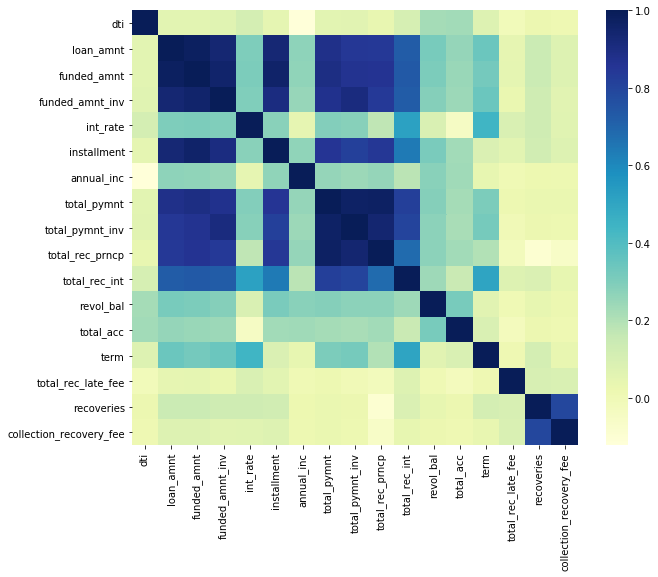

In [26]:
# let us create a correlation matrix heatmap among quantitative varibales
plt.figure(figsize=(10, 8))
sns.heatmap(loan_master[ls_quant].corr(), cmap="YlGnBu")
plt.show()

We can clearly see from above that the following group of variables are highly correlated:
1. loan_amnt,funded_amnt,funded_amnt_inv,installment
2. total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
3. groups 1 and 2 above are also highly correlated, which makes sense from business understanding point of view as higher loan amount would mean higher payments and vice versa.
4. recoveries and collection_recovery_fee
5. There is also correlation between int_rate, term and total_rec_int

From business understanding we know that there are lot of **Post-Loan variables** which we would not be helpful in tendency for default, following are such variables:

* out_prncp: Remaining outstanding principal for total amount funded.
* out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors.
* funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
* funded_amnt: The total amount committed by investors for that loan at that point in time.
* total_rec_prncp: Principal received to date.
* total_rec_int: Interest received to date.
* total_pymnt: Payments received to date for total amount funded.
* total_pymnt_inv: Payments received to date for portion of total amount funded by investors.
* total_rec_late_fee: Late fees received to date
* recoveries: post charge off gross recovery.
* collection_recovery_fee: post charge off collection fee.
* last_pymnt_d: Last month payment was received.
* last_pymnt_amnt: Last total payment amount received.
* last_credit_pull_d: The most recent month LC pulled credit for this loan.
* issue_d: The month which the loan was funded.
* installment: The monthly payment owed by the borrower if the loan originates.


In [27]:
# let us collect all such Post-Loan variables
ls_remove_cols = ['out_prncp','out_prncp_inv', 'funded_amnt_inv','funded_amnt','total_rec_prncp',
                  'total_rec_int','total_pymnt','total_pymnt_inv','total_rec_late_fee','recoveries',
                  'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','issue_d'
                  ,'installment']

In [28]:
# let us remove all Post-Loan variables from data set
loan_master.drop(ls_remove_cols,axis=1,inplace=True)

In [29]:
# let us check the variables which we would focus for analysis.
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
id                        38577 non-null int64
member_id                 38577 non-null int64
loan_amnt                 38577 non-null int64
term                      38577 non-null int64
int_rate                  38577 non-null float64
grade                     38577 non-null object
sub_grade                 38577 non-null object
emp_length                38577 non-null object
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
zip_code                  38577 non-null object
addr_state                38577 non-null object
dti                       38577 non-null float64
delinq_2yrs               38577 non-null int64
earliest_cr_line          38577 non-null object
inq_last_6mths            385

We will define a function below to do a **Segmented Univariate Analysis** for each variable to find the proportion (percentage)
of defaults for each variable compared to total number of records for that variable.


In [30]:
# let us define a new function to find the grouped proportions % of 'Charged Off' accounts
def find_grouped_proportion(x):
    gp =100*loan_master.groupby([x,'loan_status'])['id'].count()/loan_master.groupby([x])['id'].count()
    gp = gp.reset_index()
    gp.rename(columns={'id':'proportion(%)'},inplace=True)
    return gp[gp.loan_status=='Charged Off'].sort_values(by='proportion(%)',ascending=False)

Below we will do a step by step analysis of each of the variables present in data set.

### term: *variable to indicate the loan term.*

In [31]:
# let us check the distribution of defualt accounts based on term.
find_grouped_proportion('term')

,term,loan_status,proportion(%)
2,60,Charged Off,25.313785
0,36,Charged Off,11.090872


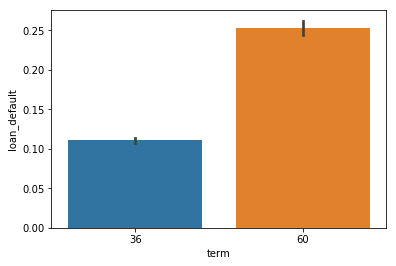

In [32]:
# lets start analysis one categorcal variable at a time and check the mean deviation from 0.15 which is for overall data
sns.barplot(x='term',y='loan_default',data=loan_master,estimator=np.mean)
plt.show()

We do see from analysis that tendency to default increase with increase in 'term' of loan, however we cannot consider 'term' as a driver variable as from our business understanding we know that term is a **Loan Variable** which the lender can adjust based on risk profile of borrower. So a higher default rate for greater term simply suggests that LC has adjusted their term for these loans.

### purpose: variable to indicate the purpose for which loan was applied for.

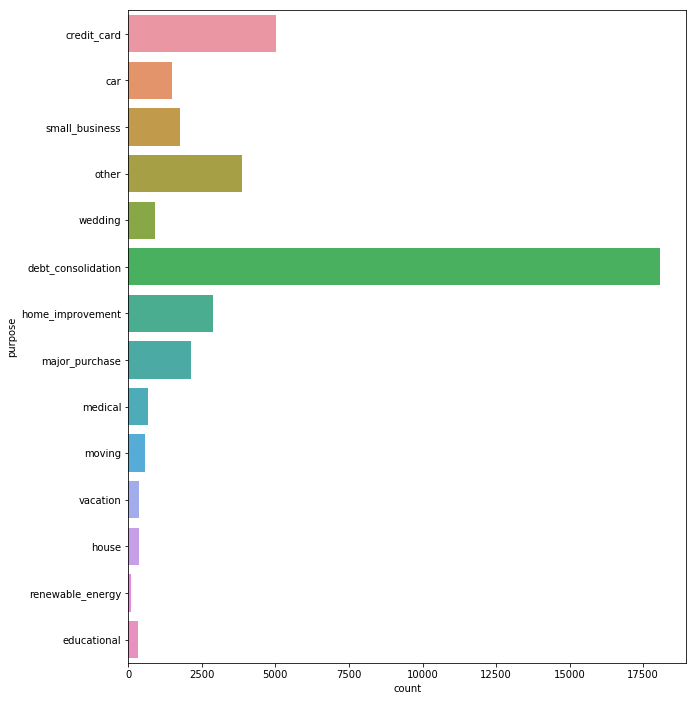

In [33]:
# let us first check the distribution of 'purpose' variable in provided data set.
plt.figure(figsize=(10,12))
sns.countplot(y=loan_master.purpose)
plt.show()

In [34]:
# check the proportion of defaults for 'purpose'
find_grouped_proportion('purpose')

,purpose,loan_status,proportion(%)
22,small_business,Charged Off,27.080958
20,renewable_energy,Charged Off,18.627451
6,educational,Charged Off,17.230769
18,other,Charged Off,16.377749
10,house,Charged Off,16.076294
16,moving,Charged Off,15.972222
14,medical,Charged Off,15.565345
4,debt_consolidation,Charged Off,15.325395
24,vacation,Charged Off,14.133333
8,home_improvement,Charged Off,12.069565


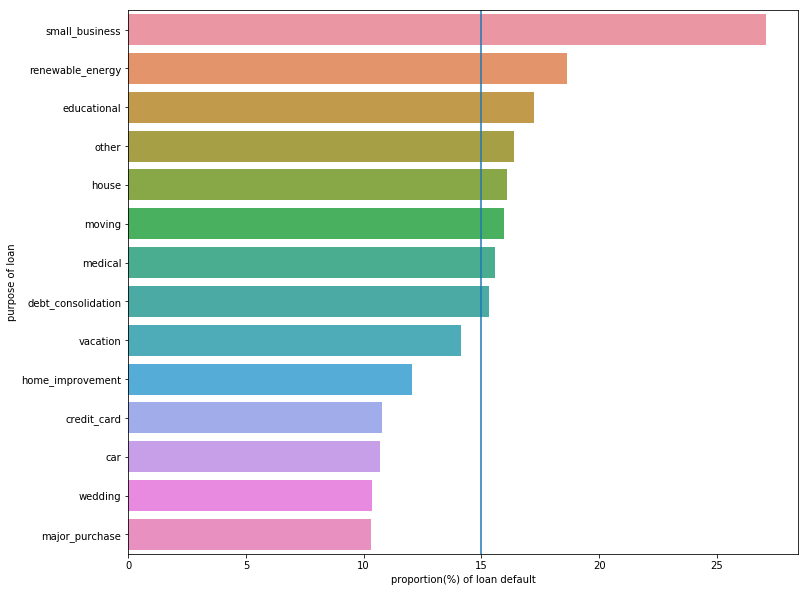

In [35]:
plt.figure(figsize=(12,10))
g = find_grouped_proportion('purpose')
sns.barplot(y='purpose',x='proportion(%)',data=g,estimator=np.mean)
plt.axvline(x=15)
plt.xlabel('proportion(%) of loan default')
plt.ylabel('purpose of loan')
plt.show()

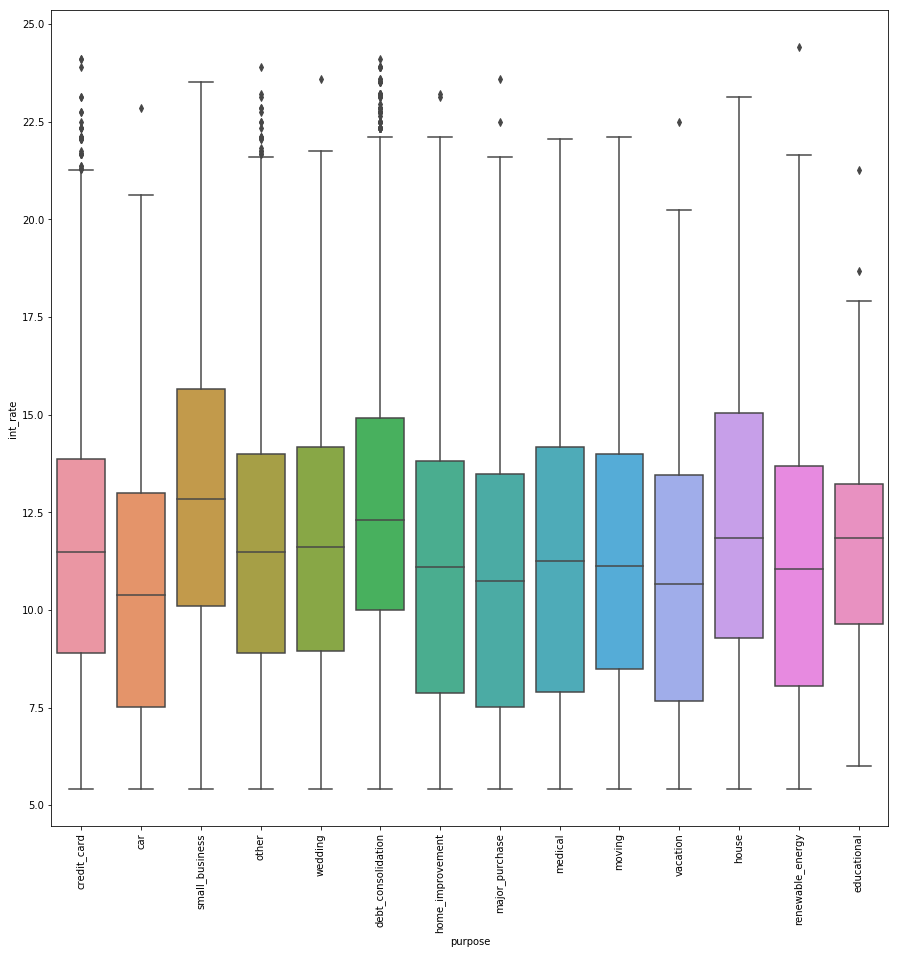

In [36]:
# let us also check how interest rate at which loan is offered is related to loan purpose
plt.figure(figsize=(15,15))
sns.boxplot(x="purpose", y="int_rate", data=loan_master)
plt.xticks(rotation=90)
plt.show()

We can see from above that median interest rates are almost similarly distributed for loan purpose even though 
The median interest rate for small business is slightly higher than others.


We can clearly see from above that **purpose is a driver** for default with loan applications having 'small_business' as purpose of loan have as much as 27% default rate. The notable purposes which have a default tendency are - small business, renewable energy, educational and other.

In [37]:
# Add purpose as a driver variable
ls_driver_var = ['purpose']

### *emp_length*: variable to indicate the number of years of employment of loan applicant.

In [38]:
find_grouped_proportion('emp_length')

,emp_length,loan_status,proportion(%)
22,n/a,Charged Off,22.071636
2,10+ years,Charged Off,15.680961
14,7 years,Charged Off,15.371128
0,1 year,Charged Off,14.389397
10,5 years,Charged Off,14.339386
20,< 1 year,Charged Off,14.174800
12,6 years,Charged Off,14.160517
16,8 years,Charged Off,14.146341
6,3 years,Charged Off,13.833500
8,4 years,Charged Off,13.824057


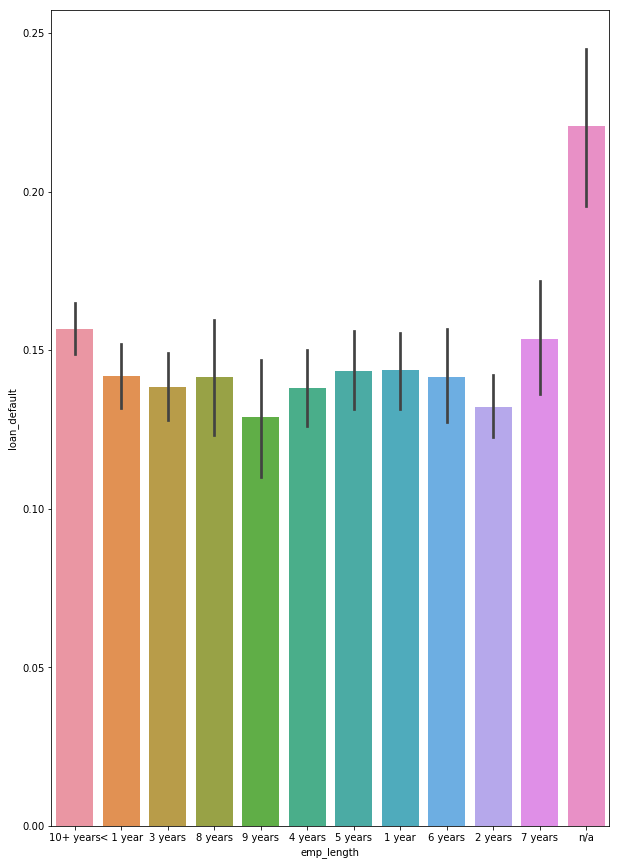

In [39]:
loan_master.emp_length[0:10]
plt.figure(figsize=(10,15))
sns.barplot(x='emp_length',y='loan_default',data=loan_master, estimator=np.mean)
plt.show()

We can see from above that there is no particular pattern between employee length and proportion of default.

### addr_state: * variable indicating the state of loan applicant.*

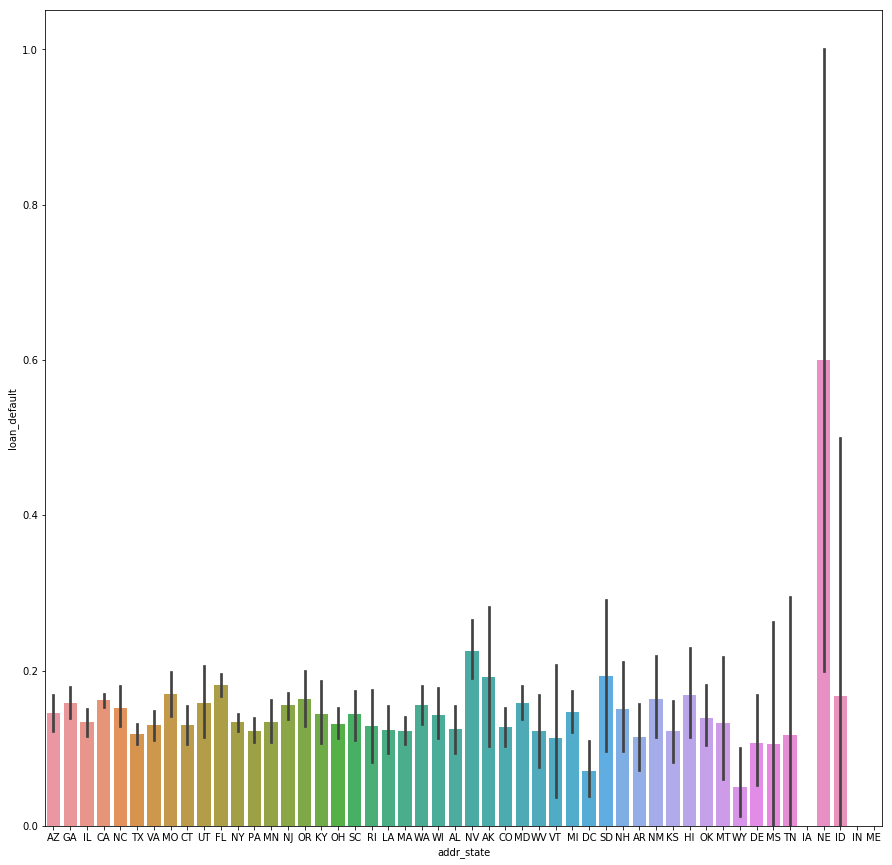

In [40]:
# let us check now for add_state. distribution of default with respect to his state of residence
plt.figure(figsize=(15,15))
sns.barplot(x='addr_state',y='loan_default',data=loan_master, estimator=np.mean)
plt.show()

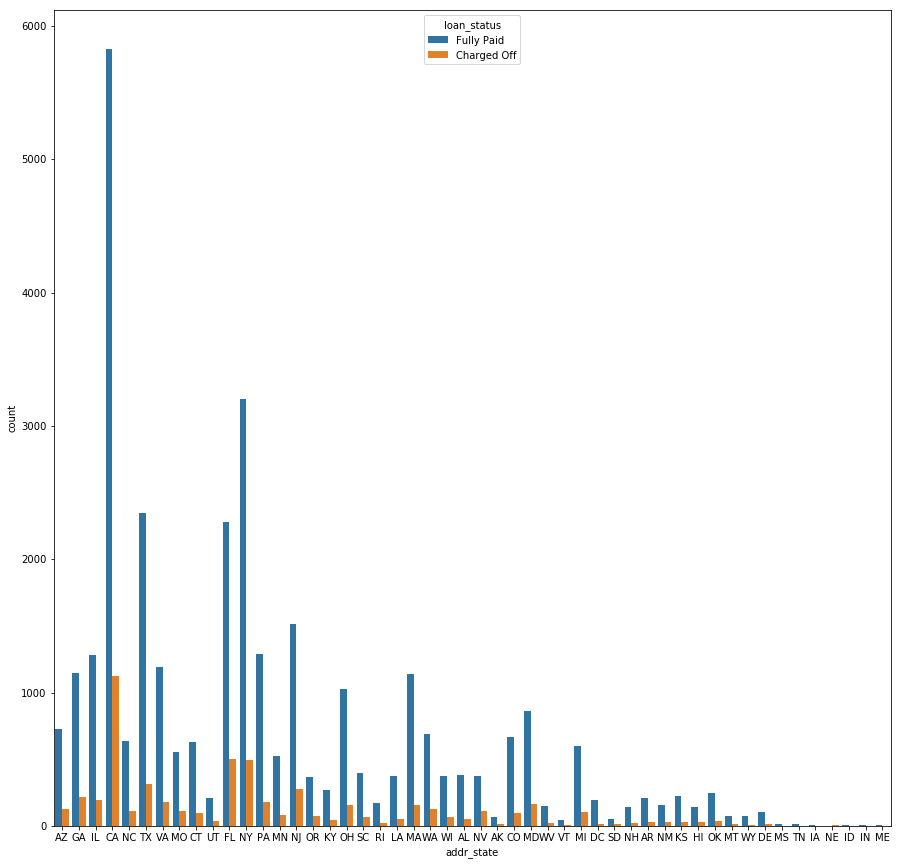

In [41]:
plt.figure(figsize=(15,15))
sns.countplot(x='addr_state',data=loan_master, hue=loan_master.loan_status)
plt.show()

In [42]:
print('Number of NE values',len(loan_master[loan_master.addr_state=='NE']))
print('% of values with state NE',round(100*len(loan_master[loan_master.addr_state=='NE'])/len(loan_master),2))

Number of NE values 5
% of values with state NE 0.01


We can see from above that as state 'NE' has very few records (0.01%) as compared to other states we cannot meaningfully conclude that there is any bearing of state on default.

### inq_last_6mths: * variable indicating the number of inquiries in past 6 months (excluding auto and mortgage inquiries)*

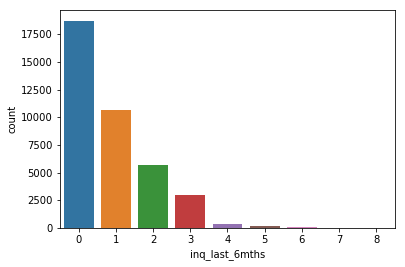

In [43]:
# let us check the distribution of variable - inq_last_6mths
sns.countplot(loan_master.inq_last_6mths)
plt.show()

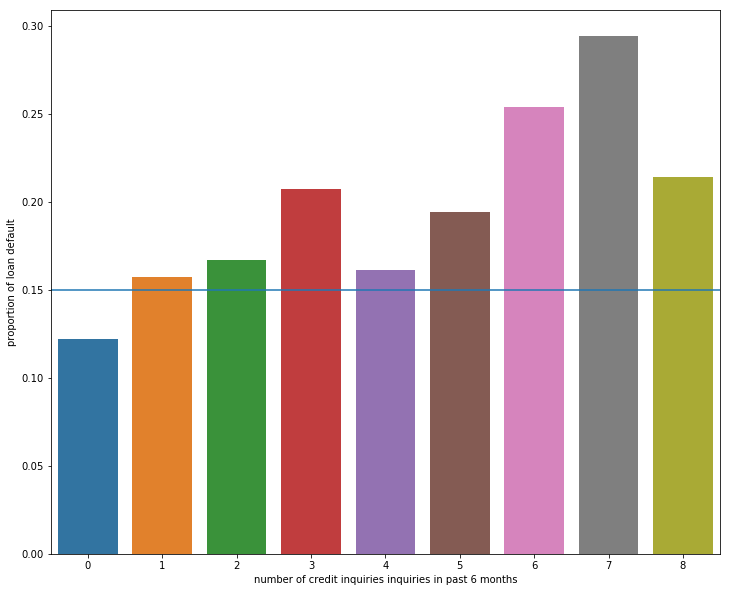

In [44]:
plt.figure(figsize=(12,10))
sns.barplot(x='inq_last_6mths',y='loan_default',data=loan_master, estimator=np.mean,ci=None)
plt.axhline(y=0.15)
plt.xlabel('number of credit inquiries inquiries in past 6 months')
plt.ylabel('proportion of loan default')
plt.show()

In [45]:
find_grouped_proportion('inq_last_6mths')

,inq_last_6mths,loan_status,proportion(%)
14,7,Charged Off,29.411765
12,6,Charged Off,25.396825
16,8,Charged Off,21.428571
6,3,Charged Off,20.750922
10,5,Charged Off,19.444444
4,2,Charged Off,16.678458
8,4,Charged Off,16.139241
2,1,Charged Off,15.731707
0,0,Charged Off,12.186648


We can see from above that tendency to default increase as the number of inquires increase, this might be an indication of **'credit seeking behaviour'**. Thus inq_last_6mths is a driver variable for tendency for default.

References: https://www.orchardplatform.com/blog/credit-variables-explained-inquiries-in-the-last-6-months/

In [46]:
# add to the list of categorical driver variable
ls_driver_var.append('inq_last_6mths')

### pub_rec_bankruptcies: * variable indicating Number of public record bankruptcies.*
### pub_rec:* variable indicating number of derogatory public records.*

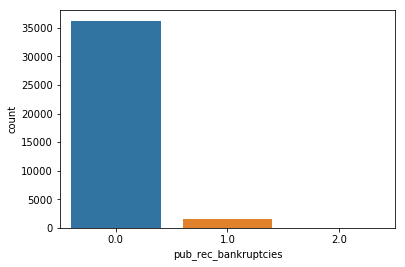

In [47]:
# check the distribution of pub_rec_bankruptcies variable
sns.countplot(loan_master.pub_rec_bankruptcies)
plt.show()

In [48]:
# let us check how many missing values are there
loan_master.pub_rec_bankruptcies.isnull().sum()

697

In [49]:
# as the proportion of values is very small compared to total data set let's imput by 0, meaning no record
loan_master.loc[loan_master.pub_rec_bankruptcies.isnull(),'pub_rec_bankruptcies'] = 0

In [50]:
# let us define a new categorical variable to indicate if there was a public record of bankruptcy or not
loan_master['was_bankrupt']= loan_master.pub_rec_bankruptcies.apply(lambda x: 1 if x !=0 else 0)

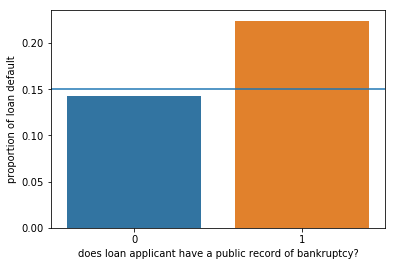

In [51]:
# let us check the distribution of default
sns.barplot(x='was_bankrupt',y='loan_default',data=loan_master, estimator=np.mean,ci=None)
plt.axhline(y= 0.15)
plt.xlabel('does loan applicant have a public record of bankruptcy?')
plt.ylabel('proportion of loan default')
plt.show()

As the number of records having public record of bankruptcy is very less, let us do a two sampled t-test to check if the difference in mean default rate is statistically significant for two samples.

H0: mean across two samples (samples having record of bankruptcy) and sample does not having record of bankruptcy is same.

H1: alternative hypothesis - the sample means are different

We will take our threshold as 5% having corresponding p value as 0.05


In [52]:
# let us check if the difference in mean is statistically significant
sample_1 = loan_master[loan_master.was_bankrupt==1].loan_default
sample_2 = loan_master[loan_master.was_bankrupt==0].loan_default

sc.stats.ttest_ind(sample_1,sample_2,equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=7.8187525951176786, pvalue=9.1579674851767771e-15)

As the p value is smaller than 0.05 we cannot accept the null hypothesis that means are same.

In [53]:
# let us check how many missing values are there
loan_master.pub_rec.isnull().sum()

0

In [54]:
# let us define a new categorical variable to indicate if there was a public record of bankruptcy or not
loan_master['has_derogatory_remarks']= loan_master.pub_rec.apply(lambda x: 1 if x !=0 else 0)

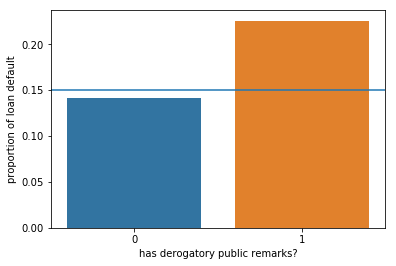

In [55]:
# let us check the distribution of default
sns.barplot(x='has_derogatory_remarks',y='loan_default',data=loan_master, estimator=np.mean,ci=None)
plt.axhline(y= 0.15)
plt.xlabel('has derogatory public remarks?')
plt.ylabel('proportion of loan default')
plt.show()

In [56]:
# let us find the proportion of default for pub_rec
find_grouped_proportion('pub_rec')

,pub_rec,loan_status,proportion(%)
2,1,Charged Off,22.702434
4,2,Charged Off,20.833333
0,0,Charged Off,14.134276


In [57]:
loan_master[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.841571
pub_rec_bankruptcies,0.841571,1.000000


We can see that **there is high correlation between pub_rec and pub_rec_bankruptcies** this is not surprising as pub_rec (Number of derogatory public records) includes pub_rec_bankruptcies (public record of bankruptcies).
So we **will include only one of the variables** as driver variable for default.

We conclude that pub_rec_bankruptcies and pub_rec are both negative driver variable and indicates possibility of a future default wherever such data is available. We will include pub_rec as one of our driver variables.

References:

* https://www.experian.com/blogs/ask-experian/meaning-of-derogatory-public-record/
* https://www.experian.com/blogs/ask-experian/how-long-do-paid-public-records-remain-on-your-report/

In [58]:
# add to the list of driver variables.
ls_driver_var.append('pub_rec')

### verification_status: * Indicates if income was verified by LC, not verified, or if the income source was verified.*

In [59]:
find_grouped_proportion('verification_status')

,verification_status,loan_status,proportion(%)
4,Verified,Charged Off,16.803212
2,Source Verified,Charged Off,14.818642
0,Not Verified,Charged Off,12.830957


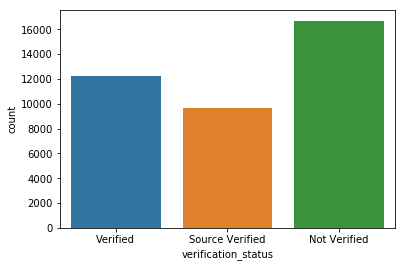

In [60]:
# check the distribution of verification status.
sns.countplot(loan_master.verification_status)
plt.show()

we see from above the verifcation_status categories counts have roughly similar distribution.

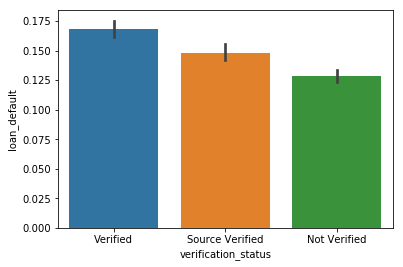

In [61]:
# check the loan default based on verification status
sns.barplot(x='verification_status',y='loan_default',data=loan_master, estimator=np.mean)
plt.show()

From above We donot find any significant impact of verification status on default tendancy.

### zip_code: * The first 3 numbers of the zip code provided by the borrower in the loan application.*

In [62]:
# define function to create bins.
def createbin(x, binsize):
    return round((x / binsize),0) * binsize

In [63]:
# extract the first 3 characters from zip code and create bins based on the same
loan_master.zip_code = loan_master.zip_code.apply(lambda x:x.replace("xx",""))
loan_master.zip_code = loan_master.zip_code.astype(int)
loan_master.zip_code = loan_master.zip_code.apply(lambda x: createbin(x,100))

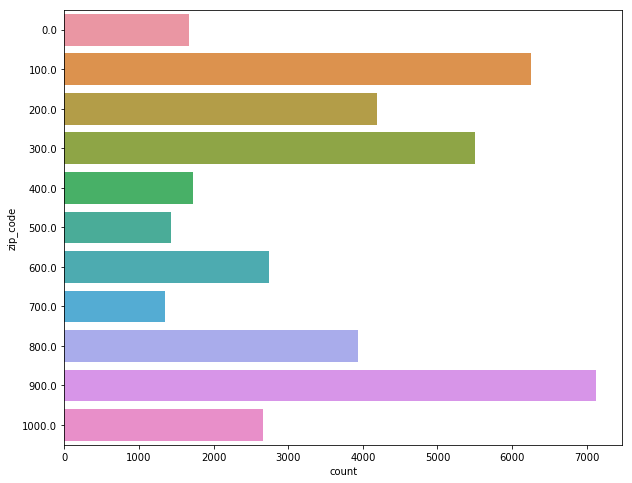

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(y=loan_master.zip_code)
plt.show()

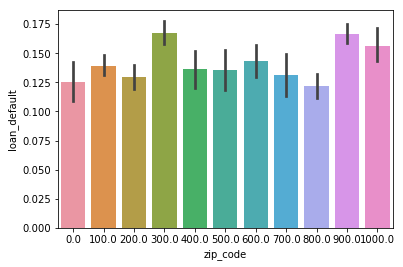

In [65]:
sns.barplot(x='zip_code',y='loan_default',data=loan_master, estimator=np.mean)
plt.show()

we observe that zip_code also does not show any particular pattern for default.

### *int_rate, grade,sub_grade* :

Based on information provided in the Lending Club website, grades and sub-grades for a loan are decided based on 
interest rate (as shown below) so sub-grades serve as a natural bin for interest rates which we will analyze.

![title](./InterestRates_Grades.png)

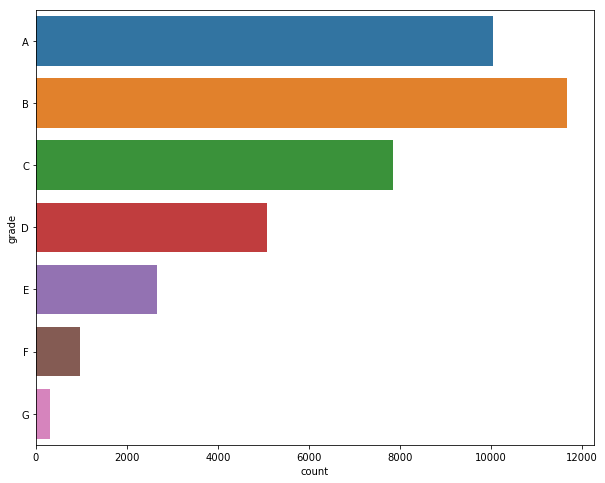

In [66]:
# let us check the distribution of grades
plt.figure(figsize=(10,8))
sns.countplot(y=loan_master.grade.sort_values())
plt.show()

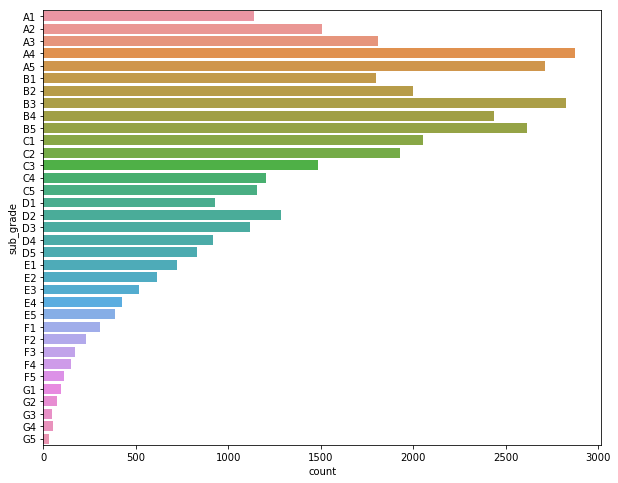

In [67]:
# let us first check the distribution of sub-grades
plt.figure(figsize=(10,8))
sns.countplot(y=loan_master.sub_grade.sort_values())
plt.show()

In [68]:
find_grouped_proportion('sub_grade')

,sub_grade,loan_status,proportion(%)
58,F5,Charged Off,47.787611
64,G3,Charged Off,42.222222
62,G2,Charged Off,36.363636
56,F4,Charged Off,35.099338
68,G5,Charged Off,34.482759
60,G1,Charged Off,32.978723
52,F2,Charged Off,30.042918
50,F1,Charged Off,29.836066
46,E4,Charged Off,29.716981
54,F3,Charged Off,29.310345


we see from that default % increase with increase in sub-grade which corresponds to an increase in interest rate, **sub-grade(interest rate)** , however in light of our business understanding we know that this is misleading as a high interest rate indicates that LC itself has adjusted the interest rate based on risk profile, therefore **we will not consider** grade/sub-grade/interest rate as a driver variable for tendency to default.

### delinq_2yrs:* variable to indicate the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years*

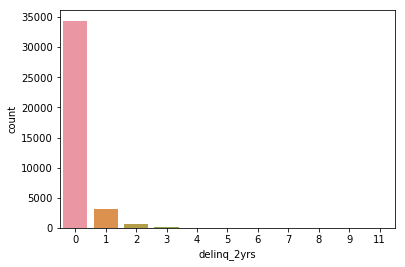

In [69]:
#let's first check the distribution of this varaible
sns.countplot(loan_master.delinq_2yrs)
plt.show()

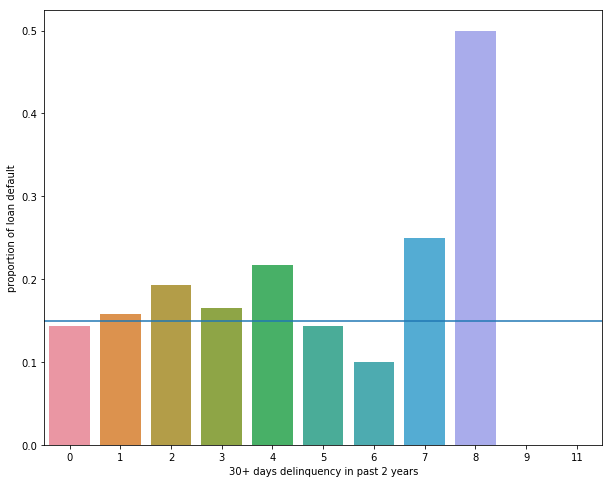

In [70]:
plt.figure(figsize=(10,8))
sns.barplot(x='delinq_2yrs',y='loan_default',data=loan_master, estimator=np.mean,ci=None)
plt.xlabel('30+ days delinquency in past 2 years')
plt.ylabel('proportion of loan default')
plt.axhline(y=0.15)
plt.show()

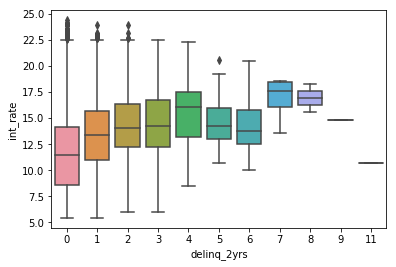

In [71]:
# let's do a bivariate analysis with int_rate and delinq_2yrs
sns.boxplot(x='delinq_2yrs',y='int_rate',data=loan_master)
plt.show()

we do see that there is a correlation between increase in past due deliquencies and increase in incidences of
default.

In [72]:
# let's check the proportion of default for delinq_2yrs
find_grouped_proportion('delinq_2yrs')

,delinq_2yrs,loan_status,proportion(%)
16,8,Charged Off,50.000000
14,7,Charged Off,25.000000
8,4,Charged Off,21.666667
4,2,Charged Off,19.316493
6,3,Charged Off,16.509434
2,1,Charged Off,15.809167
0,0,Charged Off,14.354679
10,5,Charged Off,14.285714
12,6,Charged Off,10.000000


We do observe from above that int_rate increases as delinq_2yrs increase and that there is an increase in tendency to default with increase in delinq_2yrs, so delinq_2yrs seems to be a driver variable.

In [73]:
ls_driver_var.append('delinq_2yrs')

### home_ownership: * variable to indicate home ownership status. *

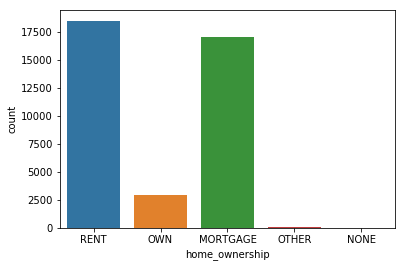

In [74]:
# let's check the distribution of home ownership.
sns.countplot(loan_master.home_ownership)
plt.show()

We note from above that the distribution conatains very few samples of ownership 'OTHER', let's check the count proportion below

In [75]:
print('percentage: ',100*len(loan_master[loan_master.home_ownership=='OTHER'])/len(loan_master))
print('number: ',len(loan_master[loan_master.home_ownership=='OTHER']))
      

percentage:  0.25403737978588276
number:  98


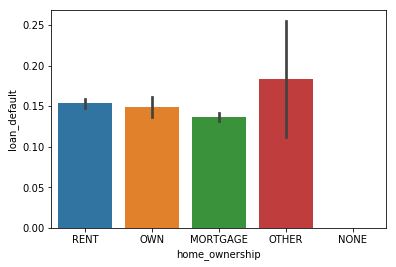

In [76]:
# let's check the distribution of default across home ownership.
sns.barplot(x='home_ownership',y='loan_default',data=loan_master, estimator=np.mean)
plt.show()

In [77]:
# find the proportion of default.
find_grouped_proportion('home_ownership')

,home_ownership,loan_status,proportion(%)
3,OTHER,Charged Off,18.367347
7,RENT,Charged Off,15.362554
5,OWN,Charged Off,14.890756
0,MORTGAGE,Charged Off,13.671347


In [78]:
loan_master[loan_master.home_ownership=='OTHER'].loan_default.mean()

0.1836734693877551

In [79]:
loan_master[loan_master.home_ownership=='OTHER'].loan_default.std()

0.38920852215985663

As the count of home ownership for 'Other' is very small and has a large standard deviation we cannot conclude that it has any signifcant impact on tendency to default. Based on given data we cannot conclude that home ownership status has any impact on default.

### annual_inc: * variable indicating the annual income of loan applicant.*

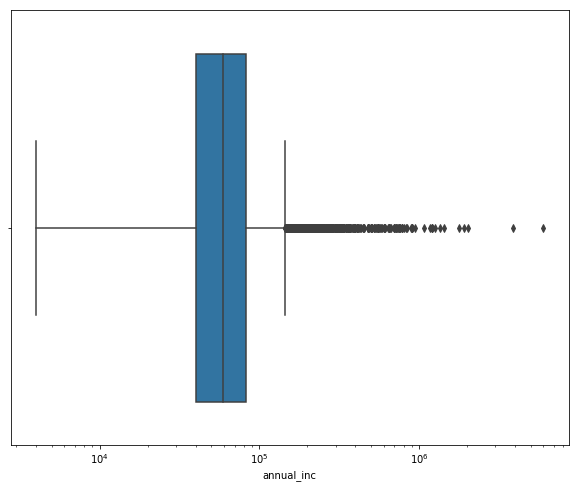

In [80]:
# let us first check how annual income is distributed.
plt.figure(figsize=(10,8))
sns.boxplot(loan_master.annual_inc)
plt.xscale('log')
plt.show()

from above boxplot we see that while most of the annual income distribution is within 200k range, there are large number of very large outlier annual income values.

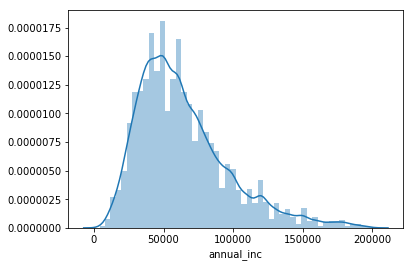

In [81]:
sns.distplot(loan_master[loan_master.annual_inc <200000].annual_inc)
plt.show()

In [82]:
# create a function to divide annual income into buckets
def Find_SalaryRange(x):
    if x >=0 and x <2000:
        return '0-2k'
    if x>=2000 and x < 5000:
        return '2-5k'
    elif x>=5000 and x < 8000:
        return '5-8k'
    elif x>=8000 and x < 10000:
        return '8-10k'
    elif x>=10000 and x < 13000:
        return '10-13k'
    elif x>=13000 and x < 16000:
        return '13-16k'
    elif x>=16000 and x < 20000:
        return '16-20k'
    elif x>=20000 and x < 30000:
        return '20-30k'
    elif x>=30000 and x < 50000:
        return '30-50k'
    elif x>=50000 and x < 100000:
        return '50-100k'
    else:
        return 'above 100K'

In [83]:
loan_master['annual_inc_range'] = loan_master.annual_inc.apply(Find_SalaryRange)

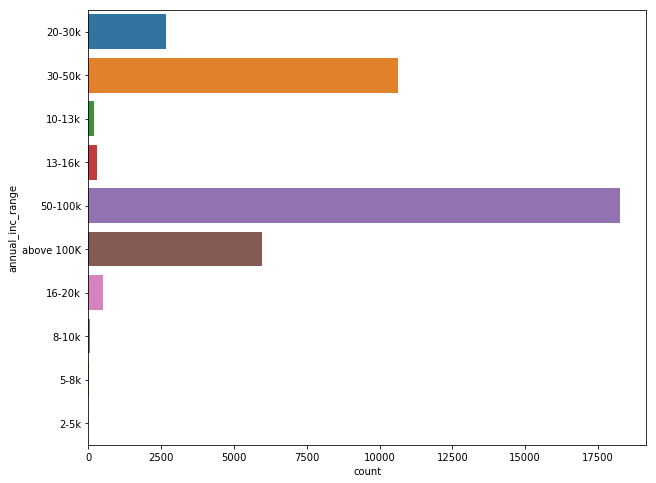

In [84]:
plt.figure(figsize=(10, 8))
sns.countplot(y=loan_master.annual_inc_range)
plt.show()

In [85]:
find_grouped_proportion('annual_inc_range')

,annual_inc_range,loan_status,proportion(%)
0,10-13k,Charged Off,28.804348
6,2-5k,Charged Off,22.222222
2,13-16k,Charged Off,20.875421
4,16-20k,Charged Off,19.678715
16,8-10k,Charged Off,18.181818
8,20-30k,Charged Off,17.616387
10,30-50k,Charged Off,16.473580
14,50-100k,Charged Off,13.894067
12,5-8k,Charged Off,13.333333
18,above 100K,Charged Off,10.771032


from above it can be observed that generally default is more at lower annual income levels.

In [86]:
# let us check if there is any correlation between loan amount and annual income
loan_master[['loan_amnt','annual_inc']].corr()

,loan_amnt,annual_inc
loan_amnt,1.000000,0.268999
annual_inc,0.268999,1.000000


There does not seem to be much correlation between loan amount and annual income which means that typically loan amounts are in the same range for person with a low income as well as person with a higher income.

From our business understanding of lending case we know that the repayment capability of a person decreases as the proportion of loan amount compared to his/her income increases. 

Let us define a new **Business Type** derived metric - **Loan Income Ratio**: loan_inc_ratio = loan_amnt/annual_inc


In [87]:
# let us create a new variable loan income ratio which is the ratio of loan amount with respect to income
loan_master['loan_inc_ratio'] = loan_master.loan_amnt/loan_master.annual_inc

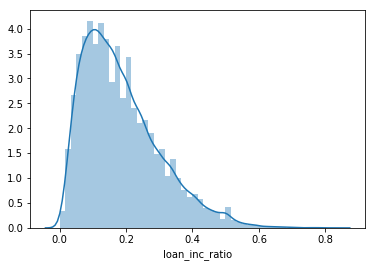

In [88]:
# let us check the distribution of loan income ratio
sns.distplot(loan_master.loan_inc_ratio)
plt.show()

In [89]:
# create a function to divide loan_income_ratio into buckets
def Find_loan_income_ratio_range(x):
    if x >=0 and x <0.1:
        return '0-0.1'
    if x>=0.1 and x < 0.2:
        return '0.1-0.2'
    elif x>=0.2 and x < 0.3:
        return '0.2-0.3'
    elif x>=0.3 and x < 0.4:
        return '0.3-0.4'
    elif x>=0.4 and x < 0.5:
        return '0.4-0.5'
    elif x>=0.5 and x < 0.6:
        return '0.5-0.6'
    elif x>=0.6 and x < 0.7:
        return '0.6-0.7'
    elif x>=0.7 and x < 0.8:
        return '0.7-0.8'
    else:
        return 'above 0.8'

In [90]:
loan_master['total_loan_inc_ratio_range'] = loan_master.loan_inc_ratio.apply(Find_loan_income_ratio_range)

In [91]:
find_grouped_proportion('total_loan_inc_ratio_range')

,total_loan_inc_ratio_range,loan_status,proportion(%)
16,above 0.8,Charged Off,50.000000
10,0.5-0.6,Charged Off,32.624113
12,0.6-0.7,Charged Off,27.710843
8,0.4-0.5,Charged Off,24.921924
14,0.7-0.8,Charged Off,23.529412
6,0.3-0.4,Charged Off,20.220588
4,0.2-0.3,Charged Off,15.903027
2,0.1-0.2,Charged Off,12.406804
0,0-0.1,Charged Off,11.292628


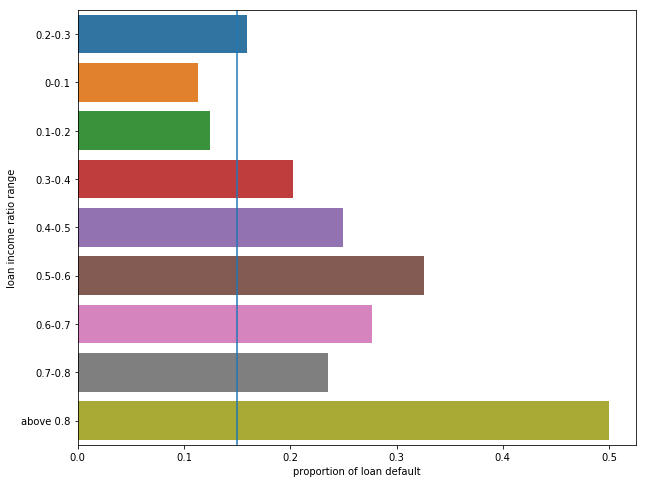

In [92]:
plt.figure(figsize=(10,8))
sns.barplot(y='total_loan_inc_ratio_range',x='loan_default',data=loan_master, estimator=np.mean,ci=None)
plt.axvline(x=0.15)
plt.ylabel('loan income ratio range')
plt.xlabel('proportion of loan default')
plt.show()

We can clearly see from above figures that there is substantial increase in tendency to default as the loan to income ratio increases more than 40%.

Loan to Income Ratio is thus a driver variable for tendency to default.


In [93]:
ls_driver_var.append('loan_inc_ratio')

### dti : * variable indicating debt to income ratio of loan applicant*

References: https://www.lendingclub.com/loans/resource-center/calculating-debt-to-income

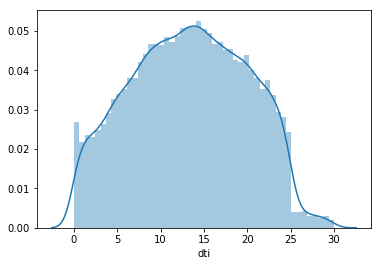

In [94]:
# let us check how dti values are distributed
sns.distplot(loan_master.dti)
plt.show()

In [95]:
# create a function to divide dti into buckets
def Find_DTI_Range(x):
    if x >=0 and x <2.5:
        return '0-2.5'
    if x>=2.5 and x < 5:
        return '2.5-5'
    elif x>=5 and x < 7.5:
        return '5-7.5'
    elif x>=7.5 and x < 10:
        return '7.5-10'
    elif x>=10 and x < 12.5:
        return '10-12.5'
    elif x>=12.5 and x < 15:
        return '12.5-15'
    elif x>=15 and x < 17.5:
        return '15-17.5'
    elif x>=17.5 and x < 20:
        return '17.5-20'
    elif x>=20 and x < 22.5:
        return '20-22.5'
    elif x>=22.5 and x < 25:
        return '22.5-25'
    else:
        return 'above 25'

In [96]:
loan_master['dti_range'] = loan_master.dti.apply(Find_DTI_Range)

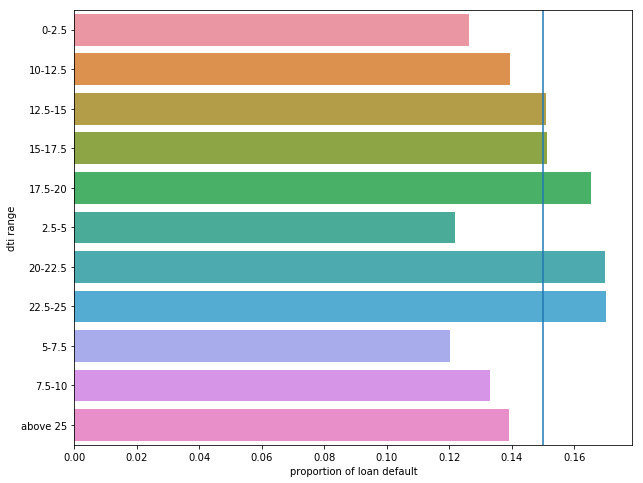

In [97]:
plt.figure(figsize=(10, 8))
sns.barplot(y=loan_master.dti_range.sort_values(),x=loan_master.loan_default,data=loan_master,estimator=np.mean,ci=None)
plt.axvline(x=0.15)
plt.xlabel('proportion of loan default')
plt.ylabel('dti range')
plt.show()

In [98]:
find_grouped_proportion('dti_range')

,dti_range,loan_status,proportion(%)
14,22.5-25,Charged Off,17.006803
12,20-22.5,Charged Off,16.971850
8,17.5-20,Charged Off,16.544725
6,15-17.5,Charged Off,15.107914
4,12.5-15,Charged Off,15.094340
2,10-12.5,Charged Off,13.937958
20,above 25,Charged Off,13.920000
18,7.5-10,Charged Off,13.307105
0,0-2.5,Charged Off,12.641674
10,2.5-5,Charged Off,12.181818


From above it can be seen that likelihood of default increase as Debt to Income ratio increases beyond 17.5. Above 25 a decrease is there but it is likely because there are very few instances where dti is more than 25.

In [99]:
ls_driver_var.append('dti')

### revol_util: * variable indicating revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.*

In [100]:
loan_master.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [101]:
# let us first convert to value removing % sign
loan_master.revol_util = loan_master.revol_util.apply(lambda x: x if pd.isnull(x) else float(x.split('%')[0]))

In [102]:
loan_master.revol_util.max()

99.900000000000006

In [103]:
# create a function to divide revolving utilization into buckets
def Find_revo_util_range(x):
    if x >=0 and x <10:
        return '0-10'
    if x>=10 and x < 20:
        return '10-20'
    elif x>=20 and x < 30:
        return '20-30'
    elif x>=30 and x < 40:
        return '30-40'
    elif x>=40 and x < 50:
        return '40-50'
    elif x>=50 and x < 60:
        return '50-60'
    elif x>=60 and x < 70:
        return '60-70'
    elif x>=70 and x < 80:
        return '70-80'
    elif x>=80 and x < 90:
        return '80-90'
    elif x>=90 and x < 100:
        return '90-100'
    else:
        return 'above 100'

In [104]:
loan_master['revol_util_range'] = loan_master.revol_util.apply(Find_revo_util_range)

In [105]:
find_grouped_proportion('revol_util_range')

,revol_util_range,loan_status,proportion(%)
20,above 100,Charged Off,32.000000
18,90-100,Charged Off,21.407907
16,80-90,Charged Off,18.868981
14,70-80,Charged Off,17.815945
12,60-70,Charged Off,16.151788
10,50-60,Charged Off,15.070456
8,40-50,Charged Off,14.258600
6,30-40,Charged Off,12.425000
4,20-30,Charged Off,11.197847
2,10-20,Charged Off,10.078455


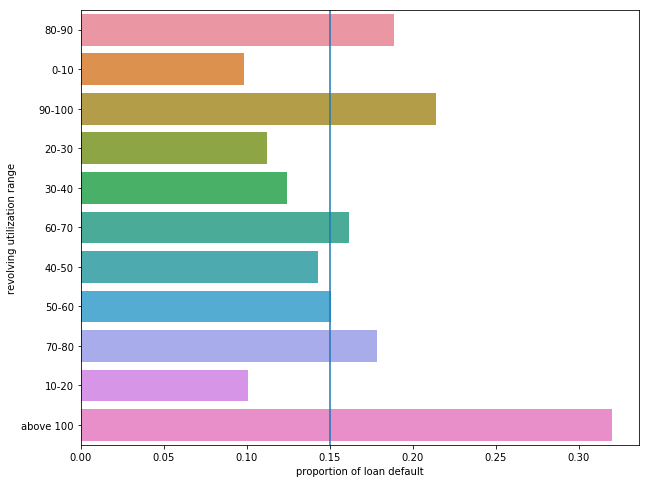

In [106]:
plt.figure(figsize=(10, 8))
sns.barplot(y=loan_master.revol_util_range,x=loan_master.loan_default,data=loan_master,estimator=np.mean,ci=None)
plt.axvline(x= 0.15)
plt.ylabel('revolving utilization range')
plt.xlabel('proportion of loan default')
plt.show()

From above it is clear that tendency to default increases as revolving line utilization rate increase beyond 60%
revol_util_range is a driver variable for tendency to default.

In [107]:
# add as a driver variable
ls_driver_var.append('revol_util')

### total_acc: * variable indicating the total number of credit lines currently in the borrower's credit file.*

In [108]:
loan_master.total_acc.max()

90

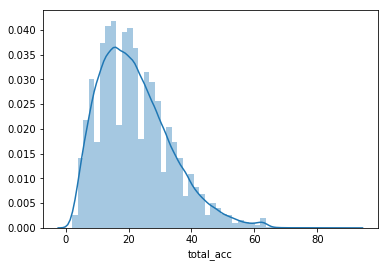

In [109]:
# let us check how total_acc varibale is distributed
sns.distplot(loan_master.total_acc)
plt.show()

In [110]:
loan_master['total_acc_range'] = loan_master.total_acc.apply(Find_revo_util_range)

In [111]:
find_grouped_proportion('total_acc_range')

,total_acc_range,loan_status,proportion(%)
0,0-10,Charged Off,16.905628
14,70-80,Charged Off,15.384615
8,40-50,Charged Off,15.072329
2,10-20,Charged Off,15.043258
12,60-70,Charged Off,14.814815
6,30-40,Charged Off,14.302384
4,20-30,Charged Off,13.422292
10,50-60,Charged Off,10.076336


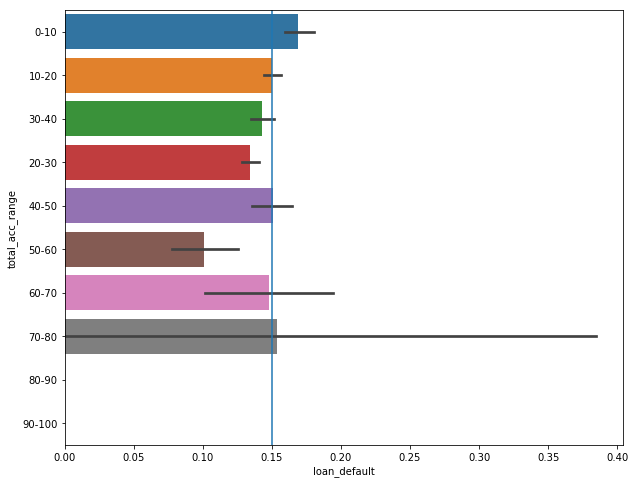

In [112]:
plt.figure(figsize=(10, 8))
sns.barplot(y=loan_master.total_acc_range,x=loan_master.loan_default,data=loan_master,estimator=np.mean)
plt.axvline(x= 0.15)
plt.show()

From above we donot see any substantial increase in tendency to default based on total number of credit lines

In [113]:
# let us check another variable revol_bal, let us check if there is a correlation between revol_bal 
# and revol_util
loan_master[['revol_bal','revol_util']].corr()

,revol_bal,revol_util
revol_bal,1.000000,0.301248
revol_util,0.301248,1.000000


There does not seem to be a high correlation between revolving balance and revolving balance utilization

In [114]:
# let us check if there is a correlation between revol_bal and total_acc
loan_master[['revol_bal','total_acc']].corr()

,revol_bal,total_acc
revol_bal,1.000000,0.312634
total_acc,0.312634,1.000000


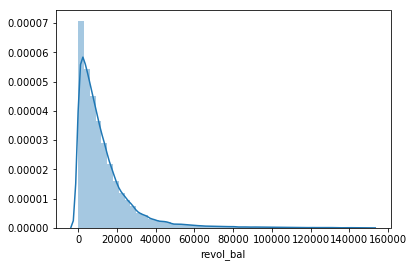

In [115]:
# let us check the distribution of revolving balance
sns.distplot(loan_master.revol_bal)
plt.show()

In [116]:
# let us define a new variable revolving balance per available credit line
loan_master['revol_bal_per_acc']=loan_master.revol_bal/loan_master.total_acc

In [117]:
find_grouped_proportion('revol_bal_per_acc')

,revol_bal_per_acc,loan_status,proportion(%)
18083,507.250000,Charged Off,100.000000
23242,715.818182,Charged Off,100.000000
23271,717.090909,Charged Off,100.000000
23269,716.954545,Charged Off,100.000000
23267,716.866667,Charged Off,100.000000
23262,716.666667,Charged Off,100.000000
23254,716.441176,Charged Off,100.000000
23253,716.440000,Charged Off,100.000000
23249,716.125000,Charged Off,100.000000
23236,715.484848,Charged Off,100.000000


In [118]:
print(loan_master['revol_bal_per_acc'].min())
print(loan_master['revol_bal_per_acc'].max())

0.0
16350.8


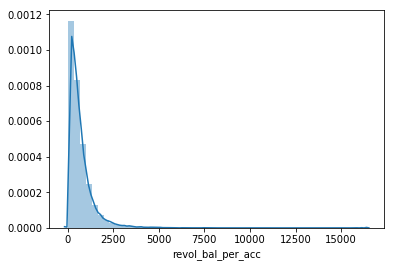

In [119]:
sns.distplot(loan_master.revol_bal_per_acc)
plt.show()

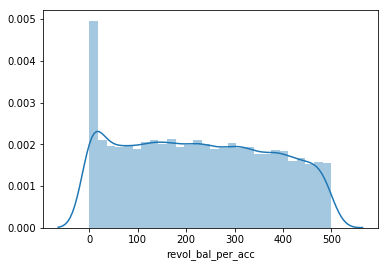

In [120]:
sns.distplot(loan_master.revol_bal_per_acc[loan_master.revol_bal_per_acc < 500])
plt.show()

In [121]:
# create a function to divide revol_bal_per_acc into buckets
def Find_revol_bal_per_acc_range(x):
    if x >=0 and x <25:
        return '0-25'
    if x>=25 and x < 50:
        return '25-50'
    elif x>=50 and x < 100:
        return '50-100'
    elif x>=100 and x < 200:
        return '100-200'
    elif x>=200 and x < 300:
        return '200-300'
    elif x>=300 and x < 400:
        return '300-400'
    elif x>=400 and x < 500:
        return '400-500'
    elif x>=500 and x < 1000:
        return '500-1000'
    elif x>=1000 and x < 1500:
        return '1000-1500'
    elif x>=1500 and x < 2000:
        return '1500-2000'
    else:
        return 'above 2000'

In [122]:
loan_master['revol_bal_per_acc_range']= loan_master.revol_bal_per_acc.apply(Find_revol_bal_per_acc_range)

In [123]:
find_grouped_proportion('revol_bal_per_acc_range')

,revol_bal_per_acc_range,loan_status,proportion(%)
6,1500-2000,Charged Off,16.524029
18,500-1000,Charged Off,15.682936
4,1000-1500,Charged Off,15.616300
14,400-500,Charged Off,14.953828
12,300-400,Charged Off,14.506173
8,200-300,Charged Off,14.219961
20,above 2000,Charged Off,14.008240
0,0-25,Charged Off,13.682746
2,100-200,Charged Off,12.861889
10,25-50,Charged Off,12.765957


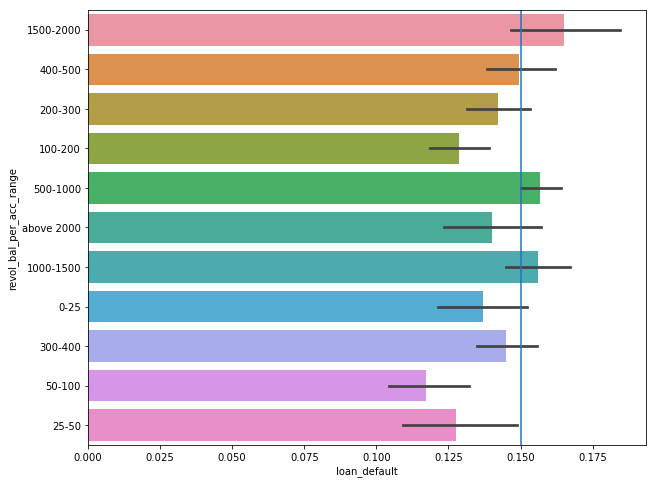

In [124]:
plt.figure(figsize=(10, 8))
sns.barplot(y=loan_master.revol_bal_per_acc_range,x=loan_master.loan_default,data=loan_master,estimator=np.mean)
plt.axvline(x= 0.15)
plt.show()

Thus we do not find any substantial evidence for tendency to default based on revolving balance of total open credit lines.

### open_acc: * variable indicating the number of open credit lines in the borrower's credit file.*

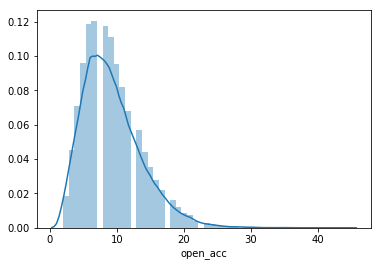

In [125]:
# check distribution of open_acc
sns.distplot(loan_master.open_acc)
plt.show()

In [126]:
# create a function to divide open acc into buckets
def Find_open_acc_range(x):
    if x >=0 and x <5:
        return '0-5'
    if x>=5 and x < 10:
        return '5-10'
    elif x>=10 and x < 15:
        return '10-15'
    elif x>=15 and x < 20:
        return '15-20'
    elif x>=20 and x < 25:
        return '20-25'
    else:
        return 'above 25'

In [127]:
loan_master['open_acc_range'] = loan_master.open_acc.apply(Find_open_acc_range)

In [128]:
find_grouped_proportion('open_acc_range')

,open_acc_range,loan_status,proportion(%)
10,above 25,Charged Off,21.578947
0,0-5,Charged Off,17.155291
2,10-15,Charged Off,14.480121
6,20-25,Charged Off,14.372716
8,5-10,Charged Off,14.157598
4,15-20,Charged Off,13.678474


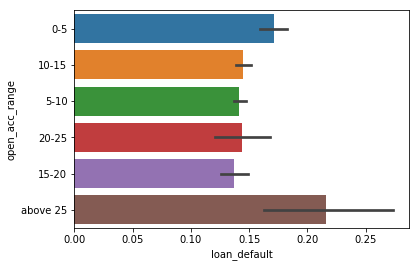

In [129]:
sns.barplot(y=loan_master.open_acc_range,x=loan_master.loan_default,data=loan_master,estimator=np.mean)
plt.show()

The above result does not give us any evidence that tendency to default increases with increase in open_acc values as number of records are quite less.

### mths_since_last_delinq: *variable indicating the number of months since the borrower's last delinquency.*

In [130]:
# lets check how many values are missing.
loan_master.mths_since_last_delinq.isnull().sum()/len(loan_master)

0.64559193301708273

We see tha 65% of values are missing for mths_since_last_delinq variable

In [131]:
find_grouped_proportion('mths_since_last_delinq')


,mths_since_last_delinq,loan_status,proportion(%)
176,107.0,Charged Off,100.000000
173,97.0,Charged Off,100.000000
166,83.0,Charged Off,40.000000
164,82.0,Charged Off,24.074074
38,19.0,Charged Off,22.413793
154,77.0,Charged Off,20.930233
112,56.0,Charged Off,20.930233
160,80.0,Charged Off,20.879121
2,1.0,Charged Off,20.689655
14,7.0,Charged Off,20.348837


We do not observe any substantial pattern which might indicate mths_since_last_delinq is a driver variable, moreover since 65% values are missing and we cannot know if in these cases there was no delinquency or data was not available, we will not include this as one of the driver variables.

### earliest_cr_line: * variable indicating the month the borrower's earliest reported credit line was opened.*

In [132]:
# convert earliest_cr_line to date time format
loan_master.earliest_cr_line = pd.to_datetime(loan_master.earliest_cr_line,format='%b-%y')

In [133]:
# create a new derived metric by Type to represent month
loan_master['earliest_cr_line_month']= loan_master.earliest_cr_line.dt.month

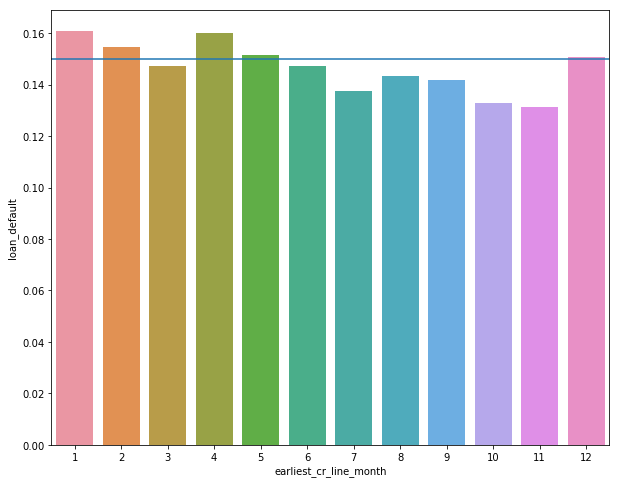

In [134]:
plt.figure(figsize=(10,8))
sns.barplot(x='earliest_cr_line_month',y='loan_default',data=loan_master, estimator=np.mean,ci=None)
plt.axhline(y=0.15)
plt.show()

From above we cannot conclude that earliest_cr_line has any impact on tendency to default.

Let’s check correlations between some of the driver variables we have identified also including leverage variables like interest rate and term.

In [135]:
ls_quant = ['loan_inc_ratio','revol_util','dti','loan_amnt'
            ,'int_rate','annual_inc','revol_bal','term']

In [136]:
loan_master[ls_quant].head()

,loan_inc_ratio,revol_util,dti,loan_amnt,int_rate,annual_inc,revol_bal,term
0,0.208333,83.7,27.65,5000,10.65,24000.0,13648,36
1,0.083333,9.4,1.00,2500,15.27,30000.0,1687,60
2,0.195886,98.5,8.72,2400,15.96,12252.0,2956,36
3,0.203252,21.0,20.00,10000,13.49,49200.0,5598,36
5,0.138889,28.3,11.20,5000,7.90,36000.0,7963,36


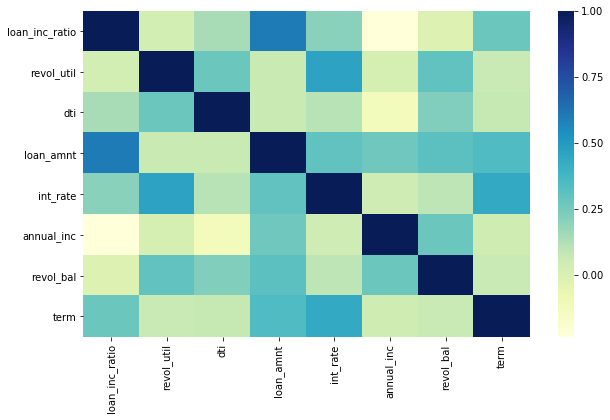

In [137]:
plt.figure(figsize=(10, 6))
sns.heatmap(loan_master[ls_quant].corr(), cmap="YlGnBu")
plt.show()

We observe as expected loan_inc_ratio has strong correlation with loan amount, while interest has a strong correlation with term.
Loan amount also has slight correlation with interest rate and term and also revolving balance.
Revolving utilization also has slight correlation with revolving balance. These two also have slight correlation with dti.

In summary we have not included any two variables having very strong correlation as our driver variables show below.


In [138]:
# list of driver variables which influence the tendency to default.
print(ls_driver_var)

['purpose', 'inq_last_6mths', 'pub_rec', 'delinq_2yrs', 'loan_inc_ratio', 'dti', 'revol_util']


## Conclusion

Following is the summary variables we found as useful indicators for tendency to default and our recommendations for the same:

* **purpose**: purpose of loan: we found that some purposes for loan have a higher tendency for default like small business, renewable energy, education and others. Some of this might be due to risk associated with these ventures. Our recommendation would be to increase interest rate or term (where interest rate is already high) for such loans.

* **inq_last_6mths**:The number of inquiries in past 6 months: we found that tendency to default increases as number of inquiries in past 6 months increases beyond 2, this suggests an evidence of 'credit seeking behaviour' on part of loan applicant. In such cases we suggest increasing interest rate or lowering the funded amount in cases where interest rate is already high to minimize the potential loss due to default.

* **pub_rec**: Number of derogatory public records: we found that if there is a record of derogatory public records present for a loan applicant that substantially increases the tendency for default. In such case we would suggest to increase the interest rate or lower the funded amount.

* **delinq_2yrs**: number of 30+ days delinquencies for applicant in past 2 years: we do observe that there is a slight increase in tendency to default if higher number of delinquencies are reported. We would suggest a marginal increase in interest rate in such cases.

* **loan_inc_ratio**: loan to income ratio: We found this derived metric to be a strong indicator of tendency to default, particularly if loan to income ratio goes beyond 40%. We recommend that while term could be increased for loan income ration beyond 40%, loan should be declined in cases the loan income ratio is beyond 60%.

* **revol_util**:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit: We found that there is an increase in tendency to default in case the revol_util increase beyond 60% and indicates an over dependency on credit on part of loan applicant. We would recommend marginally increasing the interest rate and lowering the funded amount in such cases.

* **dti**: Debt to Income Ratio: We observe that increase in dti has an impact of tendency to default which also indicates that a high portion of loan applicant's income is going towards debt repayment and hence reducing his ability to repay additional borrowings. In such case we would recommend to increase the term to lower monthly payment for cases where dti is greater than 18% and declining the loan application if dti exceeds 30%.

We also observe from the data set that while there are multiple slabs for interest rates which server as a good leverage to LC to minimize risk, we feel that we could also have additional slabs in term as well instead of the 36/60 term values that we have currently have to give more leverage to adjust for risky loan applicant profiles.
